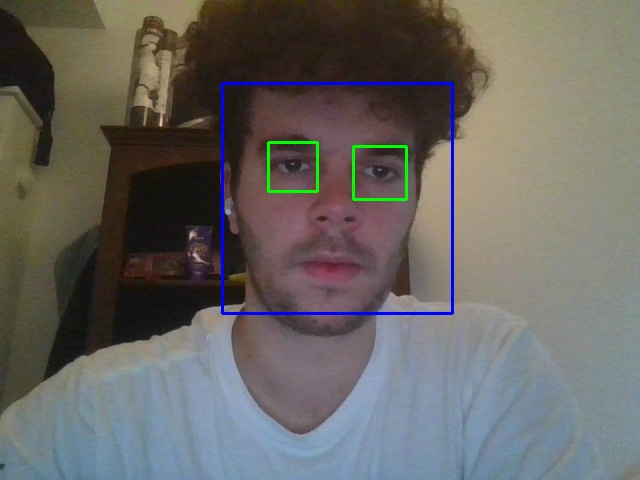

In [7]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np

# Load the cascade classifiers for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

# Start the video capture
capture = cv2.VideoCapture(0)

try:
    while True:
        # Read the frame from the video capture
        _, frame = capture.read()

        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)

        # Loop over the faces
        for (x, y, w, h) in faces:
            # Draw a rectangle around the face
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

            # Get the face ROI
            face_roi = gray[y:y+h, x:x+w]

            # Detect eyes in the face ROI
            eyes = eye_cascade.detectMultiScale(face_roi)

            # Loop over the eyes
            for (ex, ey, ew, eh) in eyes:
                # Draw a rectangle around the eyes
                cv2.rectangle(frame, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (0, 255, 0), 2)

        # Display the frame in the notebook
        _, img_encoded = cv2.imencode('.jpg', frame)
        clear_output(wait=True)
        display(Image(data=img_encoded.tobytes()))
 
except KeyboardInterrupt:
    # Handle interruption for stopping the capture
    pass

# Release the video capture
capture.release()

In [10]:
import cv2
from IPython.display import display, clear_output
from PIL import Image
import numpy as np

# Load the pre-trained DNN model for face detection
net = cv2.dnn.readNetFromCaffe(
    "deploy.prototxt", 
    "res10_300x300_ssd_iter_140000.caffemodel"
)

capture = cv2.VideoCapture(0)

try:
    while True:
        # Read a frame from the webcam
        _, frame = capture.read()
        h, w = frame.shape[:2]

        # Prepare the frame for the DNN model
        blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), (104.0, 177.0, 123.0))
        net.setInput(blob)
        detections = net.forward()

        # Loop through detections
        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.5:  # Adjust confidence threshold as needed
                box = detections[0, 0, i, 3:7] * [w, h, w, h]
                (x, y, x2, y2) = box.astype("int")
                cv2.rectangle(frame, (x, y), (x2, y2), (255, 0, 0), 2)

        # Convert the frame to RGB for displaying in Jupyter
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        pil_image = Image.fromarray(frame_rgb)

        # Display the frame in Jupyter
        clear_output(wait=True)
        display(pil_image)

except KeyboardInterrupt:
    # Handle interruption (e.g., user presses stop)
    print("Stopped.")

finally:
    capture.release()
    cv2.destroyAllWindows()

Stopped.


In [1]:
import cv2
import dlib
from IPython.display import display, clear_output
from PIL import Image

# Load the pre-trained DNN model for face detection
net = cv2.dnn.readNetFromCaffe(
    "deploy.prototxt", 
    "res10_300x300_ssd_iter_140000.caffemodel"
)

# Load dlib's facial landmark predictor
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

capture = cv2.VideoCapture(0)

try:
    while True:
        # Read a frame from the webcam
        _, frame = capture.read()
        h, w = frame.shape[:2]

        # Prepare the frame for the DNN model
        blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), (104.0, 177.0, 123.0))
        net.setInput(blob)
        detections = net.forward()

        # Loop through detections
        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.5:  # Adjust confidence threshold as needed
                box = detections[0, 0, i, 3:7] * [w, h, w, h]
                (x, y, x2, y2) = box.astype("int")
                cv2.rectangle(frame, (x, y), (x2, y2), (255, 0, 0), 2)

                # Convert face region to grayscale for dlib
                face_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                dlib_rect = dlib.rectangle(x, y, x2, y2)

                # Predict facial landmarks
                landmarks = predictor(face_gray, dlib_rect)

                # Draw circles around the eyes (landmark points 36-41 for left eye, 42-47 for right eye)
                for n in range(36, 48):  # Points for both eyes
                    x_eye = landmarks.part(n).x
                    y_eye = landmarks.part(n).y
                    cv2.circle(frame, (x_eye, y_eye), 2, (0, 255, 0), -1)

        # Convert the frame to RGB for displaying in Jupyter
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        pil_image = Image.fromarray(frame_rgb)

        # Display the frame in Jupyter
        clear_output(wait=True)
        display(pil_image)

except KeyboardInterrupt:
    # Handle interruption (e.g., user presses stop)
    print("Stopped.")

finally:
    capture.release()
    cv2.destroyAllWindows()

Stopped.
